In [26]:
import numpy as np
import os
# os.chdir('/Users/adityabansal/Desktop/data_with_notebook/')
import util_mnist_reader as mnist_reader
# root_path="/Users/adityabansal/Desktop/data_with_notebook/"
X_train, y_train = mnist_reader.load_mnist('../data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('../data/fashion', kind='t10k')

import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix ,accuracy_score
import warnings
warnings.filterwarnings('ignore')

from keras.models import Sequential, model_from_json
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization,MaxPooling2D
from keras.optimizers import RMSprop,Adam,Adadelta
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

## Neural Network with One Hidden Layer

### Sigmod

In [27]:
def sigmoid(z):
  return 1/(1+ np.exp(-z))

### Derivative Sigmoid

In [28]:
def derv_sigmoid(z):
  return z*(1-z)

### Cost Entropy

In [29]:
def cost_entropy(x,y):
    m = y.shape[0]
    dw = x - y
    return dw/m

### Loss Function

In [30]:
def cost(x, y):
      m = y.shape[0]
      logp=y*np.log(x)
      loss=-np.sum(logp)/m
      return loss

### Softmax Function

In [31]:
def softmax(z):
    exps = np.exp(z)# - np.max(z, axis=1, keepdims=True))
    return exps/np.sum(exps, axis=1, keepdims=True)

### Normalizing training and test data(X)

In [32]:
X_train=X_train/255.0
X_test=X_test/255.0

### Normalizing training and test data(Y)

In [33]:
Y_train=tf.keras.utils.to_categorical(
    y_train,
    num_classes=10
)
Y_test=tf.keras.utils.to_categorical(
    y_test,
    num_classes=10  
)

### Taking test data as validation data

In [34]:
y_val=Y_test
X_val=X_test

### Derfining Hyperparameters

In [35]:
epochs=50
learningrate=0.75
classifiers=10
nodes=256
batchsize=500

### Initializing Variables

In [36]:
losstrack=[]
loss_train1=[]
losstrack_val=[]
trainaccuracy=[]
acc_train=0
acc_val=0
acc_train_total=[]
acc_val_complete=[]
classes=10

### Initializing Weights and bias with random values

In [37]:
weight1=np.random.randn(X_train.shape[1],nodes)
weight2=np.random.randn(nodes,classifiers)
bias1=np.random.randn(1,nodes)
bias2=np.random.randn(1,classifiers)

### Forward Propagation and Backward Propagation(Training of Data)

In [38]:
for epoch in range(epochs):  #Traininig data for every epoch(Hyperparameter)
    
    a=0
    b=batchsize
    
    index=np.random.permutation(X_train.shape[0])
    
    for i in range(int(X_train.shape[0]/batchsize)):
     
      x_train1=X_train[index[a:b]]
      y_train1=Y_train[index[a:b]]
      
      #Linear regression equation
    
      #Train Feed Forward
        #Layer 1
      z1_train = np.dot(x_train1,weight1) + bias1
      p1_train = sigmoid(z1_train)
        #Layer 2
      z2_train = np.dot(p1_train,weight2 ) + bias2
      p2_train = softmax(z2_train)
       
      
      # Validation Feed Forward
        #Layer1
      z1_val = np.dot(X_val,weight1) + bias1
      p1_val = sigmoid(z1_val)
        #Layer2
      z2_val = np.dot(p1_val,weight2 ) + bias2
      p2_val = softmax(z2_val) 
      
      for i in range(y_train1.shape[0]):
          if p2_train[i].argmax() == y_train1[i].argmax():
              acc_train +=1
         
      acc_train_total.append(acc_train)


      p2_train_delta=cost_entropy(p2_train,y_train1)
        
      z1_train_delta=np.dot(p2_train_delta,weight2.T)
      p1_train_delta=z1_train_delta*derv_sigmoid(p1_train)

      weight2 -= learningrate*np.dot(p1_train.T,p2_train_delta) 
      bias2 -= learningrate*np.sum(p2_train_delta,axis=0, keepdims=True) 


      weight1 -= learningrate*np.dot(x_train1.T,p1_train_delta) 
      bias1 -= learningrate*np.sum(p1_train_delta,axis=0, keepdims=True) 
      
      
      #Loss for train data
      loss_train=cost(p2_train,y_train1)
      losstrack.append(loss_train)
      a+=batchsize
      b+=batchsize  
        #Loss for Validation data  
    loss_val=cost(p2_val,y_val)
    losstrack_val.append(loss_val)
    loss_train1.append(np.mean(losstrack))
    losstrack=[]

            
    acc_val=0
    for i in range(y_val.shape[0]):
      if p2_val[i].argmax() == y_val[i].argmax():
          acc_val +=1 
      acc_val_complete.append(acc_val)      
      
      

### Plot Graph for Loss of traing and validation data

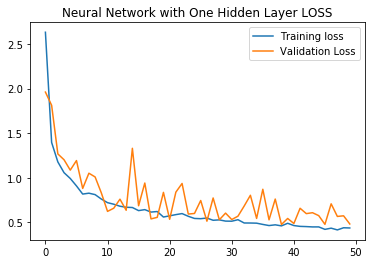

In [39]:
plt.title('Neural Network with One Hidden Layer LOSS')
plt.plot(loss_train1)
plt.plot(losstrack_val)
plt.legend(['Training loss', 'Validation Loss'], loc='upper right')
plt.show()

### Finding predicted values for our test data

In [40]:
z1_test = np.dot(X_test,weight1) + bias1
p1_test = sigmoid(z1_test)

z2_test = np.dot(p1_test,weight2 ) + bias2
p2_test = softmax(z2_test)

### Finidng Accuracy for training data

In [43]:
acc=0
for i in range(y_train1.shape[0]):
    
    if p2_train[i].argmax() == y_train1[i].argmax():
         acc +=1
         
print("Train Accuracy for last training batch :-")
print(acc)
print("Train Accuracy Percent :-")
print(acc/len(p2_train)*100)

Train Accuracy for last training batch :-
426
Train Accuracy Percent :-
85.2


### Finidng Accuracy for test data

In [44]:
acc_test=0
for i in range(Y_test.shape[0]):
    
    if p2_test[i].argmax() == Y_test[i].argmax():
         acc_test +=1
print("Test Accuracy:-")         
print(acc_test)
print("Test Accuracy Percent :-")
print(acc_test/len(p2_test)*100)

Test Accuracy:-
8439
Test Accuracy Percent :-
84.39


### Confusion matrix for test data

In [45]:

x=[]
y=[]
for i in range(Y_test.shape[0]):
  x.append(p2_test[i].argmax())
  y.append(Y_test[i].argmax())
print(confusion_matrix(x,y,))

[[904   8  40  70   5   0 247   0   9   1]
 [  3 958   2  14   1   0   5   0   0   0]
 [ 10   4 693  13  65   0  94   0   7   0]
 [ 25  20   8 810  25   1  21   0   4   0]
 [ 12   6 197  69 867   1 140   0  10   0]
 [  4   0   2   1   0 937   0  35   9  16]
 [ 32   2  53  15  30   0 469   0   7   1]
 [  0   0   0   0   0  31   2 904   5  31]
 [ 10   2   4   8   7   9  22   1 947   1]
 [  0   0   1   0   0  21   0  60   2 950]]


## Multilayer Neural Network using Keras

### Initializing model and defining layers

In [74]:
model = Sequential() 
model.add(Dense(128, input_dim=X_train.shape[1], activation='sigmoid')) 
model.add(Dense(128, activation='relu')) # Hidden Layer 1
model.add(Dense(128, activation='relu')) # Hidden Layer 2
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

### Checking summary of our model

In [75]:
model.summary() # Finidnig summary of model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_32 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_33 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_34 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_35 (Dense)             (None, 10)                1290      
Total params: 151,306
Trainable params: 151,306
Non-trainable params: 0
_________________________________________________________________


### Compiling our model and training data by mention hyperparameters in model.fit() function

In [76]:
model.compile(optimizer=Adadelta(), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
history=model.fit(X_train, Y_train,validation_data=(X_test,Y_test) ,epochs=50, batch_size=500)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 61us/step - loss: 1.0676 - categorical_accuracy: 0.5938 - val_loss: 0.7092 - val_categorical_accuracy: 0.7339
Epoch 2/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.5975 - categorical_accuracy: 0.7709 - val_loss: 0.5623 - val_categorical_accuracy: 0.7913
Epoch 3/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.5086 - categorical_accuracy: 0.8090 - val_loss: 0.4944 - val_categorical_accuracy: 0.8148
Epoch 4/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.4673 - categorical_accuracy: 0.8257 - val_loss: 0.4597 - val_categorical_accuracy: 0.8336
Epoch 5/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.4373 - categorical_accuracy: 0.8388 - val_loss: 0.4510 - val_categorical_accuracy: 0.8322
Epoch 6/50
60000/60000 [==============================] - 2s 40us/step - loss: 0.4179 - categor

### Plotting training and validation loss graph

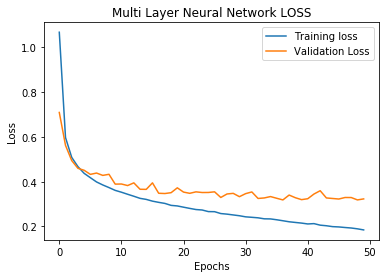

In [77]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Multi Layer Neural Network LOSS')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training loss', 'Validation Loss'], loc='upper right')
plt.show()

### Finding accuracy of test data and getting confusion matrix

In [78]:

y_pred = model.predict(X_test, batch_size=64,verbose=0,steps=None)
Y_pred = np.argmax(y_pred, axis=1)

acc_multineural=0
for i in range(Y_test.shape[0]):
    
    if Y_pred[i] == Y_test[i].argmax():
         acc_multineural +=1
         
print("Test Accuracy of Multilayer Neural Network:-")         
print(acc_multineural)
print()
print("Test Accuracy Percent of Multilayer Neural Network:-")         
print(acc_multineural/len(Y_test)*100)
print()
print("Confusion Matrix of Multilayer Neural Network:-")
print()
print(confusion_matrix(Y_pred,y))

Test Accuracy of Multilayer Neural Network:-
8879

Test Accuracy Percent of Multilayer Neural Network:-
88.79

Confusion Matrix of Multilayer Neural Network:-

[[797   2  10  16   0   0  78   0   5   1]
 [  2 974   1  15   2   0   2   0   1   0]
 [ 19   1 779  15  61   0  68   0   1   0]
 [ 11  16   8 864  20   0  19   0   4   0]
 [  3   3 121  39 852   0  61   0   3   0]
 [  2   0   1   0   0 964   0  25   6   4]
 [158   3  78  44  61   0 763   0   6   0]
 [  0   0   0   0   0  14   0 939   3  19]
 [  8   1   2   7   4   1   9   1 971   0]
 [  0   0   0   0   0  21   0  35   0 976]]


## Convolution Neural Network

### Defining layers of convolution

In [60]:
X_train_conv=X_train
X_test_conv=X_test
X_train_conv = X_train_conv.reshape(-1, 28,28, 1)
X_test_conv = X_test_conv.reshape(-1, 28,28, 1)
model_c = Sequential()
model_c.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model_c.add(Activation('relu'))
model_c.add(MaxPooling2D(pool_size=(2,2)))
model_c.add(Conv2D(64, (3,3)))
model_c.add(Activation('relu'))
model_c.add(MaxPooling2D(pool_size=(2,2)))
model_c.add(Flatten())
model_c.add(Dense(64))
model_c.add(Dense(10))
model_c.add(Activation('softmax'))
model_c.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

### Training our data

In [61]:
history_conv=model_c.fit(X_train_conv, Y_train,validation_data=(X_test_conv,Y_test), batch_size=1000, epochs=50)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 38s 641us/step - loss: 0.9193 - acc: 0.6886 - val_loss: 0.5493 - val_acc: 0.7983
Epoch 2/50
60000/60000 [==============================] - 38s 631us/step - loss: 0.4794 - acc: 0.8258 - val_loss: 0.4666 - val_acc: 0.8300
Epoch 3/50
60000/60000 [==============================] - 37s 612us/step - loss: 0.4104 - acc: 0.8540 - val_loss: 0.4113 - val_acc: 0.8514
Epoch 4/50
60000/60000 [==============================] - 37s 612us/step - loss: 0.3722 - acc: 0.8686 - val_loss: 0.3818 - val_acc: 0.8645
Epoch 5/50
60000/60000 [==============================] - 39s 651us/step - loss: 0.3481 - acc: 0.8774 - val_loss: 0.3650 - val_acc: 0.8715
Epoch 6/50
60000/60000 [==============================] - 37s 620us/step - loss: 0.3372 - acc: 0.8802 - val_loss: 0.3656 - val_acc: 0.8693
Epoch 7/50
60000/60000 [==============================] - 37s 625us/step - loss: 0.3189 - acc: 0.8867 - val_loss: 0.

### Plotting loss for each epoch of train and validation data

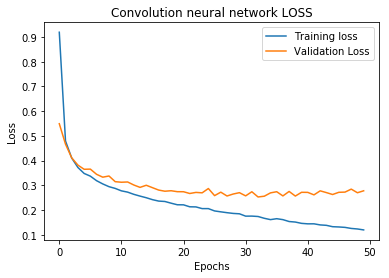

In [62]:
plt.plot(history_conv.history['loss'])
plt.plot(history_conv.history['val_loss'])
plt.title('Convolution neural network LOSS')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training loss', 'Validation Loss'], loc='upper right')
plt.show()

### Finding accuracy and confusion matrix for our train data

In [80]:
y_pred_train_conv = model_c.predict(X_train_conv, batch_size=64,verbose=0,steps=None)
y_pred_train_conv = np.argmax(y_pred_train_conv, axis=1)
acc_conv_train=0
for i in range(Y_train.shape[0]):
    
    if y_pred_train_conv[i] == Y_train[i].argmax():
         acc_conv_train +=1
         
print("Train Accuracy Percent:-")
print(acc_conv_train/len(Y_train)*100)

Train Accuracy Percent:-
95.99499999999999


### Finding accuracy and confusion matrix for our test data

In [79]:
y_pred_test_conv = model_c.predict(X_test_conv, batch_size=64,verbose=0,steps=None)
y_pred_test_conv = np.argmax(y_pred_test_conv, axis=1)
acc_conv=0
for i in range(Y_test.shape[0]):
    
    if y_pred_test_conv[i] == Y_test[i].argmax():
         acc_conv +=1
         

print("Test Accuracy Percent:-")
print(acc_conv/len(Y_test)*100)
print("Confusion Matrix:")
print(confusion_matrix(y_pred_test_conv,y))

Test Accuracy Percent:-
90.86999999999999
Confusion Matrix:
[[816   3  11   7   1   0  89   0   2   1]
 [  1 981   1   4   0   0   0   0   0   0]
 [ 30   2 887  13  47   0  73   0   4   0]
 [ 39  11  11 950  33   0  32   0   4   0]
 [  5   0  44  14 866   0  87   0   1   0]
 [  1   0   0   0   0 972   0   9   1   8]
 [102   3  45  12  52   0 715   0   7   0]
 [  0   0   0   0   0  20   0 984   2  53]
 [  6   0   1   0   1   2   4   0 979   1]
 [  0   0   0   0   0   6   0   7   0 937]]
